## Analizing Air Quality Data in India (2017 - 2022): https://www.kaggle.com/datasets/fedesoriano/air-quality-data-in-india

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# Models
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [127]:
df = pd.read_csv('/data/notebook_files/air-quality-india.csv')
df.head()

,Timestamp,Year,Month,Day,Hour,PM2.5
0,2017-11-07 12:00:00,2017,11,7,12,64.51
1,2017-11-07 13:00:00,2017,11,7,13,69.95
2,2017-11-07 14:00:00,2017,11,7,14,92.79
3,2017-11-07 15:00:00,2017,11,7,15,109.66
4,2017-11-07 16:00:00,2017,11,7,16,116.50


In [128]:
# Saving original DataFrame
original_df = df

# 1. Data analyzing

## Dropping unnecessary columns and making DataTime column as an index

In [129]:
# Making Timestamp column as insex
df.set_index(df['Timestamp'], inplace=True)
df.drop(['Timestamp', 'Year', 'Month', 'Day', 'Hour'], axis=1, inplace=True)

# changing dtype of index -> to data_tyme format
df.index = pd.to_datetime(df.index)
df.head()

,PM2.5
Timestamp,
2017-11-07 12:00:00,64.51
2017-11-07 13:00:00,69.95
2017-11-07 14:00:00,92.79
2017-11-07 15:00:00,109.66
2017-11-07 16:00:00,116.50


In [130]:
# checking dtype of the index column
df.index.dtype

dtype('<M8[ns]')

In [131]:
# renaming the target column

df.rename(columns={"PM2.5": "pm"}, inplace=True)
#df.head()
df.describe()

,pm
count,36192.000000
mean,49.308429
std,24.863511
min,7.020000
25%,28.080000
50%,45.730000
75%,64.520000
max,245.630000


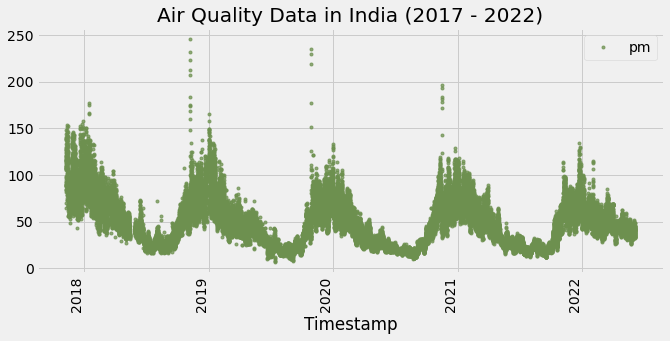

In [132]:
# Plotting our data
df.plot(style='.',
        alpha=0.75, rot=90,
        figsize=(10, 5),
        color=color_pal[3],
        title='Air Quality Data in India (2017 - 2022)')
plt.show()

# 2. Data cleaning

## Finding outliers and removing them

<AxesSubplot:ylabel='Frequency'>

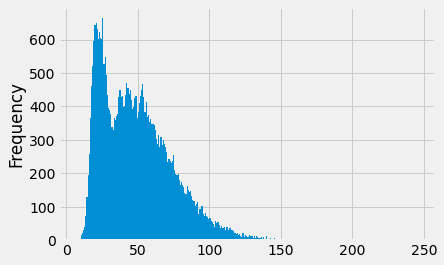

In [133]:
# Ploting the range of target values
df.pm.plot(kind='hist', bins=300)

<AxesSubplot:title={'center':'Outliers'}, xlabel='Timestamp'>

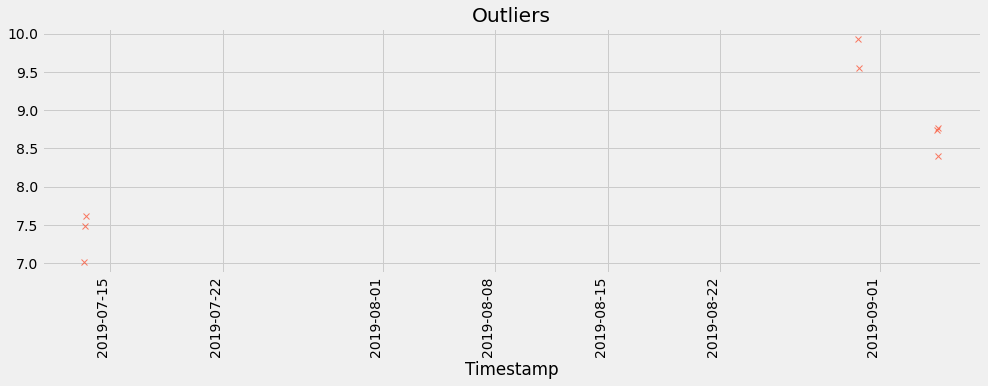

In [134]:
df.query('pm <= 10')['pm'] \
    .plot(style='x',
          alpha=0.75, rot=90,
          figsize=(15, 5),
          color=color_pal[1],
          title='Outliers')

In [135]:
df.query('pm <= 10').index

DatetimeIndex(['2019-07-13 09:00:00', '2019-07-13 10:00:00',
               '2019-07-13 11:00:00', '2019-08-30 15:00:00',
               '2019-08-30 16:00:00', '2019-09-04 13:00:00',
               '2019-09-04 14:00:00', '2019-09-04 15:00:00'],
              dtype='datetime64[ns]', name='Timestamp', freq=None)

### We may see that there were only a few hours during three dates with such low values. Assume that on the listed time sensors were not working. So let's remove that data from the Data Frame

<AxesSubplot:title={'center':'Outliers'}, xlabel='Timestamp'>

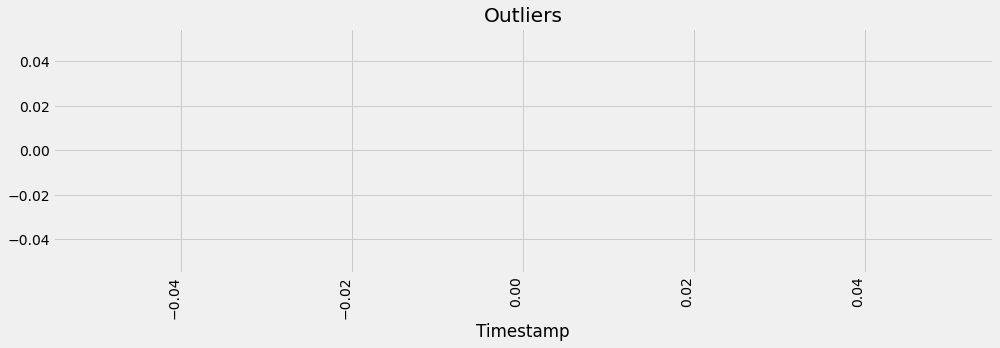

In [136]:
df = df.query('pm > 10').copy()
df.query('pm < 10')['pm'] \
    .plot(style='x',
          alpha=0.75, rot=90,
          figsize=(15, 5),
          color=color_pal[5],
          title='Outliers')

<AxesSubplot:title={'center':'Outliers'}, xlabel='Timestamp'>

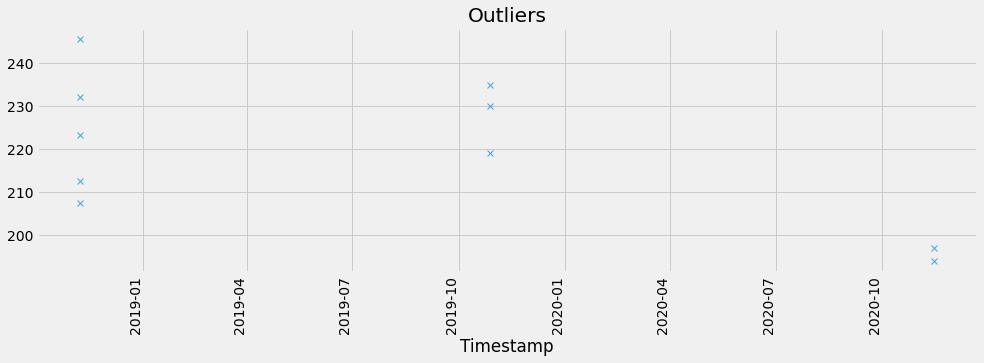

In [137]:
df.query('pm > 190')['pm'] \
    .plot(style='x',
          alpha=0.75, rot=90,
          figsize=(15, 5),
          color=color_pal[0],
          title='Outliers')

In [138]:
df.query('pm > 195').index

DatetimeIndex(['2018-11-07 18:00:00', '2018-11-07 19:00:00',
               '2018-11-07 20:00:00', '2018-11-07 21:00:00',
               '2018-11-07 22:00:00', '2019-10-27 23:00:00',
               '2019-10-28 00:00:00', '2019-10-28 01:00:00',
               '2020-11-14 19:00:00'],
              dtype='datetime64[ns]', name='Timestamp', freq=None)

### We may see that there were only a few hours during tree short periods with such high values. Assume that on the listed time sensors were working improperly. So let's remove that data too

<AxesSubplot:title={'center':'Outliers'}, xlabel='Timestamp'>

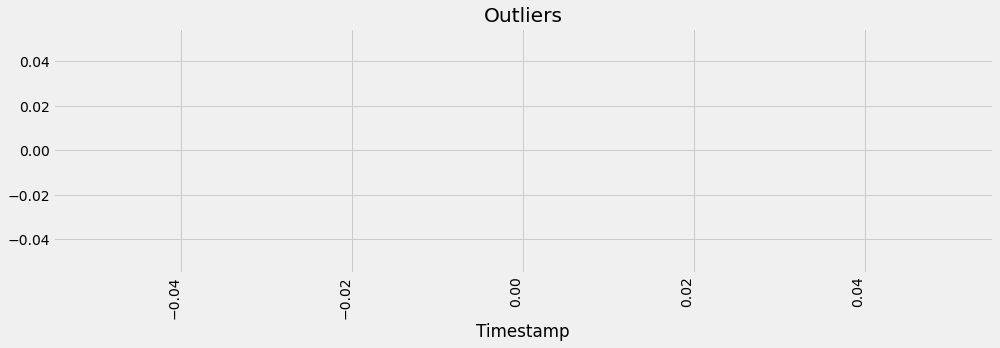

In [139]:
df = df.query('pm <= 195').copy()
df.query('pm > 200')['pm'] \
    .plot(style='x',
          alpha=0.75, rot=90,
          figsize=(15, 5),
          color=color_pal[5],
          title='Outliers')

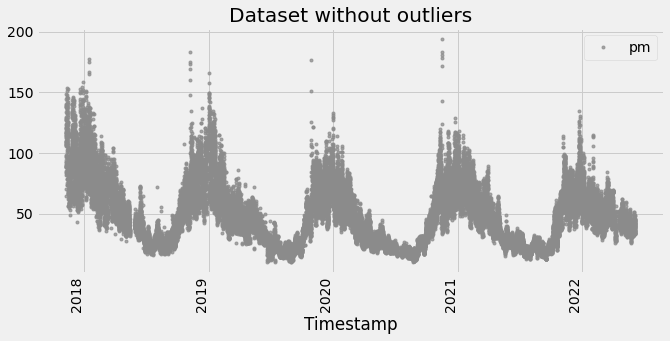

In [140]:
# Plotting clear data
df.plot(style='.',
        alpha=0.75, rot=90,
        figsize=(10, 5),
        color=color_pal[4],
        title='Dataset without outliers')
plt.show()

## Saving clear dataset without outliers

In [141]:
clear_df = df.copy()

# Checking dtype of index column
print(f"Dtype of index column is: {clear_df.index.dtype}\nIt's shape is: {clear_df.shape}")

Dtype of index column is: datetime64[ns]
It's shape is: (36175, 1)


# 3. Train / Test Split

In [142]:
split_data = '2021-07-01 12:00:00'
train = df.loc[df.index <= split_data].copy()
test = df.loc[df.index > split_data].copy()

print(f"Training set got {train.shape[0]} records")
print(f"Testing set got {test.shape[0]} records")
print(f"Test DF is {round(test.shape[0] / df.shape[0] * 100, 2)}% of main DF")

Training set got 28902 records
Testing set got 7273 records
Test DF is 20.11% of main DF


## Analyzing Train and Test Datasets

In [143]:
train.describe()

,pm
count,28902.000000
mean,50.455891
std,25.682851
min,10.210000
25%,28.480000
50%,46.190000
75%,66.870000
max,193.800000


In [144]:
test.describe()

,pm
count,7273.000000
mean,44.579308
std,19.706758
min,12.340000
25%,25.680000
50%,44.440000
75%,57.640000
max,134.540000


In [145]:
df_checking = df.copy()
df_checking['date'] = df_checking.index

df_checking_trainDF = df_checking.loc[df.index <= split_data].copy()
print(f"First date is {df_checking_trainDF.iloc[0].date}")
print(f"Last date is {df_checking_trainDF.iloc[-1].date}")

First date is 2017-11-07 12:00:00
Last date is 2021-07-01 12:00:00


In [146]:
df_checking_testDF = df_checking.loc[df.index > split_data].copy()
print(f"First date is {df_checking_testDF.iloc[0].date}")
print(f"Last date is {df_checking_testDF.iloc[-1].date}")

First date is 2021-07-01 13:00:00
Last date is 2022-06-04 15:00:00


## Plotting Train and Test DataSets

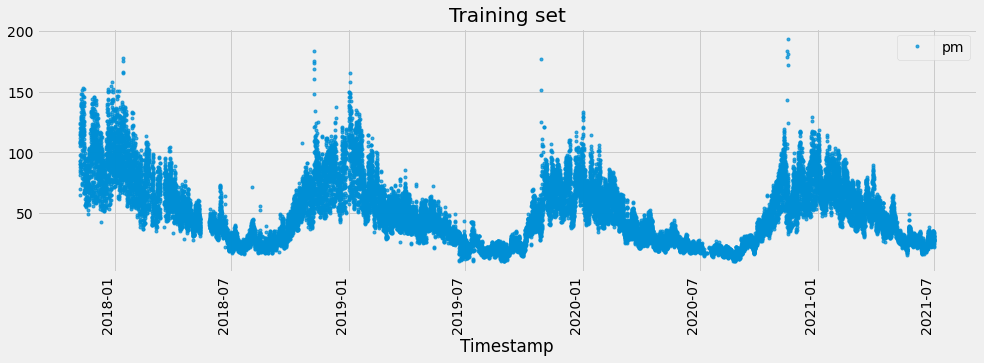

In [147]:
train.plot(style='.',
        alpha=0.75, rot=90,
        figsize=(15, 5),
        color=color_pal[0],
        title='Training set')
plt.show()

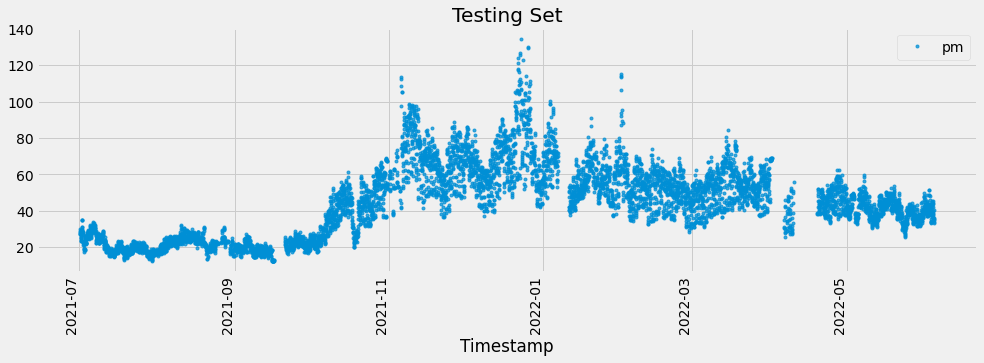

In [148]:
test.plot(style='.',
        alpha=0.75, rot=90,
        figsize=(15, 5),
        color=color_pal[0],
        title='Testing Set')
plt.show()

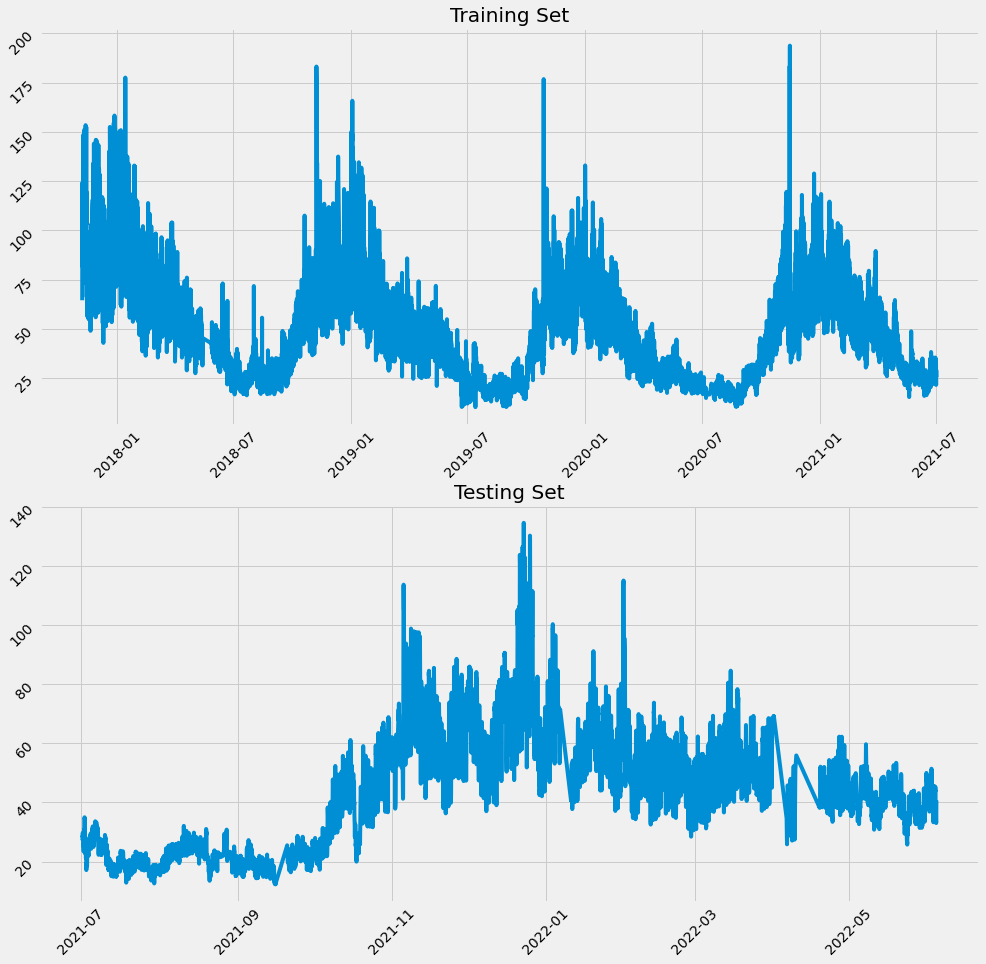

In [149]:
figure, axis = plt.subplots(2, 1)
figure.set_figheight(15)
figure.set_figwidth(15)

X1 = train.index
Y1 = train.pm
axis[0].plot(X1, Y1)
axis[0].set_title("Training Set")
axis[0].tick_params(labelrotation=45)

X2 = test.index
Y2 = test.pm
axis[1].plot(X2, Y2)
axis[1].set_title("Testing Set")
axis[1].tick_params(labelrotation=45)
#plt.xticks(rotation=45, ha='right')

plt.show()

# 4. Feature Engineering

## Data_tipe features

In [150]:

def create_features(df):
    df['date'] = df.index
    df['date'] = pd.to_datetime(df.date)
    df['hour'] = df['date'].dt.hour
    df['day_of_week'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['day_of_year'] = df['date'].dt.dayofyear
    df['day_of_month'] = df['date'].dt.day
    df['week_of_year'] = df['date'].dt.isocalendar().week
    df.drop(['date'], axis=1, inplace=True)

    #Mooving target to the end of the DataFrame
    df = df.reindex(columns = [col for col in df.columns if col != 'pm'] + ['pm'])
    return df

df = create_features(df)

df.head()

,hour,day_of_week,quarter,month,year,day_of_year,day_of_month,week_of_year,pm
Timestamp,,,,,,,,,
2017-11-07 12:00:00,12,1,4,11,2017,311,7,45,64.51
2017-11-07 13:00:00,13,1,4,11,2017,311,7,45,69.95
2017-11-07 14:00:00,14,1,4,11,2017,311,7,45,92.79
2017-11-07 15:00:00,15,1,4,11,2017,311,7,45,109.66
2017-11-07 16:00:00,16,1,4,11,2017,311,7,45,116.50


### Saving current DataFrame

In [151]:
clear_df_plus_dt_features = df.copy()
clear_df_plus_dt_features.head()

,hour,day_of_week,quarter,month,year,day_of_year,day_of_month,week_of_year,pm
Timestamp,,,,,,,,,
2017-11-07 12:00:00,12,1,4,11,2017,311,7,45,64.51
2017-11-07 13:00:00,13,1,4,11,2017,311,7,45,69.95
2017-11-07 14:00:00,14,1,4,11,2017,311,7,45,92.79
2017-11-07 15:00:00,15,1,4,11,2017,311,7,45,109.66
2017-11-07 16:00:00,16,1,4,11,2017,311,7,45,116.50


## Lag Features

In [152]:
def add_lags(df):
    target_map = df['pm'].to_dict()
    df['lag1'] = (df.index - pd.Timedelta('364 days')).map(target_map)
    df['lag2'] = (df.index - pd.Timedelta('728 days')).map(target_map)
    df['lag3'] = (df.index - pd.Timedelta('1092 days')).map(target_map)
    return df

In [153]:
df = add_lags(df)

In [154]:
df.tail()

,hour,day_of_week,quarter,month,year,day_of_year,day_of_month,week_of_year,pm,lag1,lag2,lag3
Timestamp,,,,,,,,,,,,
2022-06-04 11:00:00,11,5,2,6,2022,155,4,22,35.89,23.49,19.53,27.59
2022-06-04 12:00:00,12,5,2,6,2022,155,4,22,33.83,22.21,20.26,27.39
2022-06-04 13:00:00,13,5,2,6,2022,155,4,22,33.05,22.44,20.96,28.79
2022-06-04 14:00:00,14,5,2,6,2022,155,4,22,35.29,23.45,21.34,29.38
2022-06-04 15:00:00,15,5,2,6,2022,155,4,22,40.67,24.05,24.12,27.93


### Saving current DataFrame

In [155]:
clear_df_plus_dt_features_plus_lags = df.copy()
clear_df_plus_dt_features_plus_lags.tail()

,hour,day_of_week,quarter,month,year,day_of_year,day_of_month,week_of_year,pm,lag1,lag2,lag3
Timestamp,,,,,,,,,,,,
2022-06-04 11:00:00,11,5,2,6,2022,155,4,22,35.89,23.49,19.53,27.59
2022-06-04 12:00:00,12,5,2,6,2022,155,4,22,33.83,22.21,20.26,27.39
2022-06-04 13:00:00,13,5,2,6,2022,155,4,22,33.05,22.44,20.96,28.79
2022-06-04 14:00:00,14,5,2,6,2022,155,4,22,35.29,23.45,21.34,29.38
2022-06-04 15:00:00,15,5,2,6,2022,155,4,22,40.67,24.05,24.12,27.93


### Creating lists of basic feutures' and target's names

In [156]:
FEATURES = [
    'hour',
    'day_of_week',
    'quarter',
    'month',
    'year',
    'day_of_year',
    'day_of_month',
    #'week_of_year',
]

TARGET = 'pm'

# 5. Training models

## Time Series Cross Validation

In [157]:
tss = TimeSeriesSplit(n_splits=4, test_size=24*365*1, gap=24)
df = df.sort_index()

fold = 0
preds = []
scores = []

In [158]:
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]

    train = create_features(train)
    test = create_features(test)

    FEATURES = [
        'hour',
        'day_of_week',
        'quarter',
        'month',
        'year',
        'day_of_year',
        'day_of_month',
        
        #'week_of_year',
        'lag1',
        'lag2',
        'lag3'
        ]

    TARGET = 'pm'

    X_train = train[FEATURES]
    y_train = train[TARGET]

    X_test = test[FEATURES]
    y_test = test[TARGET]

    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.001)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=50)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)

[15:49:37] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[15:49:37] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:97.13266	validation_1-rmse:63.03598
[50]	validation_0-rmse:92.55605	validation_1-rmse:58.86684
[100]	validation_0-rmse:88.20768	validation_1-rmse:54.87886
[150]	validation_0-rmse:84.07514	validation_1-rmse:50.95420
[200]	validation_0-rmse:80.14773	validation_1-rmse:47.31572
[250]	validation_0-rmse:76.41592	validation_1-rmse:43.96862
[300]	validation_0-rmse:72.87004	validation_1-rmse:40.91565
[350]	validation_0-rmse:69.50126	validation_1-rmse:38.15062
[400]	validation_0-rmse:66.29868

WARNING - (py.warnings._showwarnmsg) - <ipython-input-150-1226bd9b79a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df.index

WARNING - (py.warnings._showwarnmsg) - <ipython-input-150-1226bd9b79a1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df.date)

WARNING - (py.warnings._showwarnmsg) - <ipython-input-150-1226bd9b79a1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [159]:
print(f"Score across folds {np.mean(scores):0.4f}")
print(f"Fold scores:{scores}")

Score across folds 20.4450
Fold scores:[27.127718625007034, 15.733551042718748, 22.432704504589932, 16.486166624079377]


# 6. Predicting using our super-model

### Let's use RGBoost one more time but useing all DataSet's data

In [160]:
df = clear_df.copy()

In [161]:
df.head()

,pm
Timestamp,
2017-11-07 12:00:00,64.51
2017-11-07 13:00:00,69.95
2017-11-07 14:00:00,92.79
2017-11-07 15:00:00,109.66
2017-11-07 16:00:00,116.50


In [162]:
df = create_features(df)
df = add_lags(df)

FEATURES = [
        'hour',
        'day_of_week',
        'quarter',
        'month',
        'year',
        'day_of_year',
        'day_of_month',
        
        #'week_of_year',
        'lag1',
        'lag2',
        'lag3'
        ]
TARGET = 'pm'

X_all = df[FEATURES]
y_all = df[TARGET]

reg = xgb.XGBRegressor(base_score=0.5,
                       booster='gbtree',    
                       n_estimators=2000,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.1)
reg.fit(X_all, y_all,
        eval_set=[(X_all, y_all)],
        verbose=100)

y_pred = reg.predict(X_all)

[15:50:11] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:49.60718
[100]	validation_0-rmse:9.34769
[200]	validation_0-rmse:8.68942
[300]	validation_0-rmse:8.24216
[400]	validation_0-rmse:7.85559
[500]	validation_0-rmse:7.53467
[600]	validation_0-rmse:7.30687
[700]	validation_0-rmse:7.12068
[800]	validation_0-rmse:6.96196
[900]	validation_0-rmse:6.83994
[1000]	validation_0-rmse:6.72532
[1100]	validation_0-rmse:6.59644
[1200]	validation_0-rmse:6.48612
[1300]	validation_0-rmse:6.39370
[1400]	validation_0-rmse:6.30415
[1500]	validation_0-rmse:6.22393
[1600]	validation_0-rmse:6.13690
[1700]	validation_0-rmse:6.04467
[1800]	validation_0-rmse:5.98123
[1900]	validation_0-rmse:5.92090
[1999]	validation_0-rmse:5.86036


In [163]:
y_pred_df = clear_df.copy()
#y_pred_df.pm = y_pred

In [164]:
y_pred_df.head()

,pm
Timestamp,
2017-11-07 12:00:00,64.51
2017-11-07 13:00:00,69.95
2017-11-07 14:00:00,92.79
2017-11-07 15:00:00,109.66
2017-11-07 16:00:00,116.50


Text(0.5, 1.05, 'Features Correlation of Full Dataset')

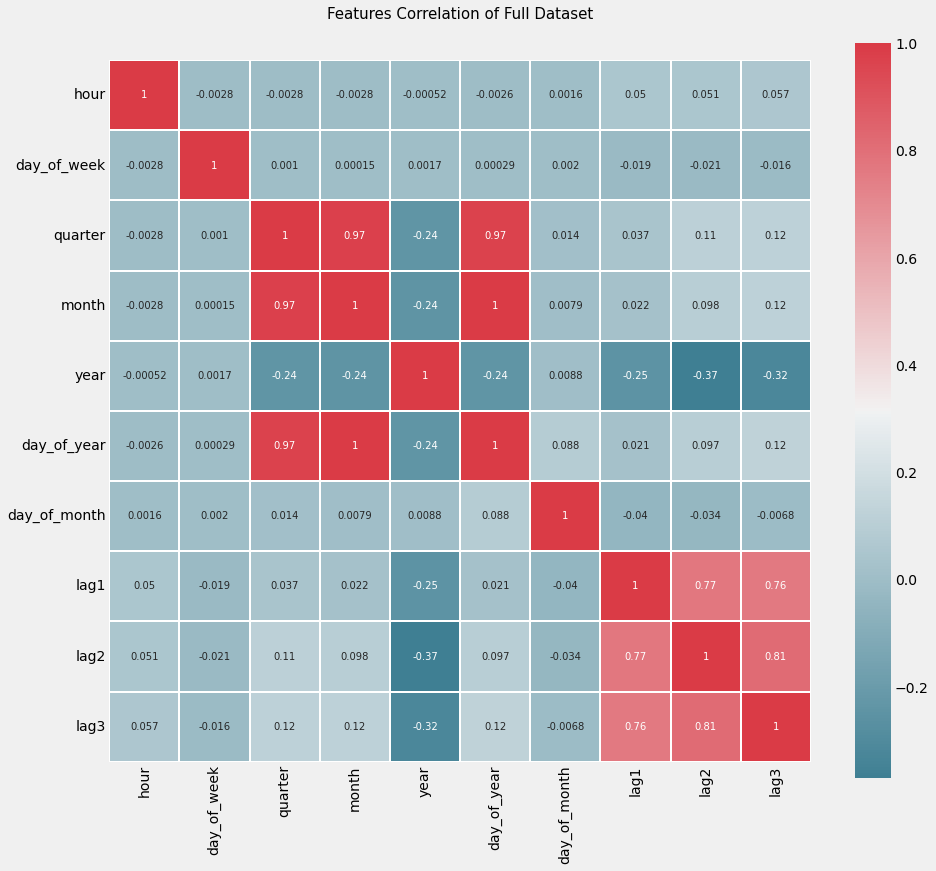

In [165]:
f, ax = plt.subplots(figsize = (14, 14))
colormap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(
    df[FEATURES].corr('pearson'), 
    cmap=colormap,
    square=True, 
    cbar_kws={'shrink': .9}, 
    ax=ax,
    annot=True, 
    linewidths=0.1, vmax=1.0, linecolor='white',
    annot_kws={'fontsize': 10}
)

plt.title('Features Correlation of Full Dataset', y=1.05, size=15)

In [166]:
rgb_score = np.sqrt(mean_squared_error(y_all, y_pred))
print(f"The score when we're using all data is: {rgb_score:.3f}")

The score when we're using all data is: 5.860


In [167]:
# Checking coefficient of determination of the model
print(f"Coefficient of Determination is equel to: {r2_score(clear_df, y_pred):.4f}")

Coefficient of Determination is equel to: 0.9438


In [168]:
#
print(reg.feature_importances_)

[0.08262264 0.01555235 0.00683224 0.02602831 0.15133707 0.37574074
 0.02162283 0.25048065 0.03117609 0.03860704]


In [169]:
features = tuple(FEATURES)
features

('hour',
 'day_of_week',
 'quarter',
 'month',
 'year',
 'day_of_year',
 'day_of_month',
 'lag1',
 'lag2',
 'lag3')

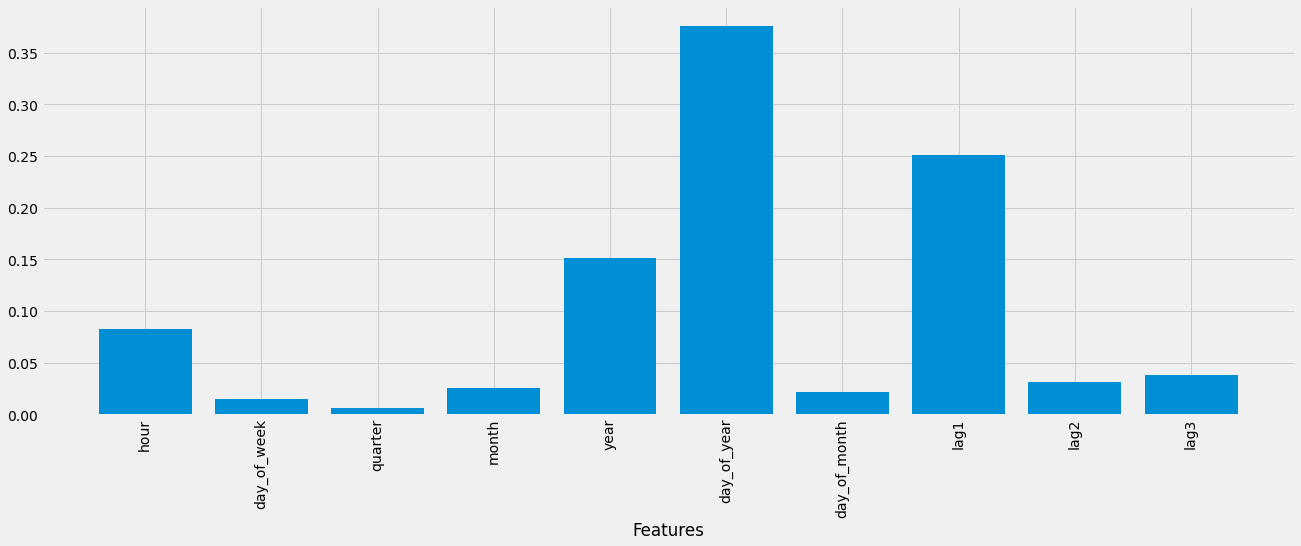

In [170]:
fig, ax = plt.subplots()

features = tuple(FEATURES)
y_pos = np.arange(len(features))

plt.bar(range(len(reg.feature_importances_)), reg.feature_importances_)
ax.set_xticks(y_pos, labels=features)
fig.set_figheight(7)
fig.set_figwidth(20)
plt.xlabel('Features')
plt.xticks(rotation = 90)
plt.show()

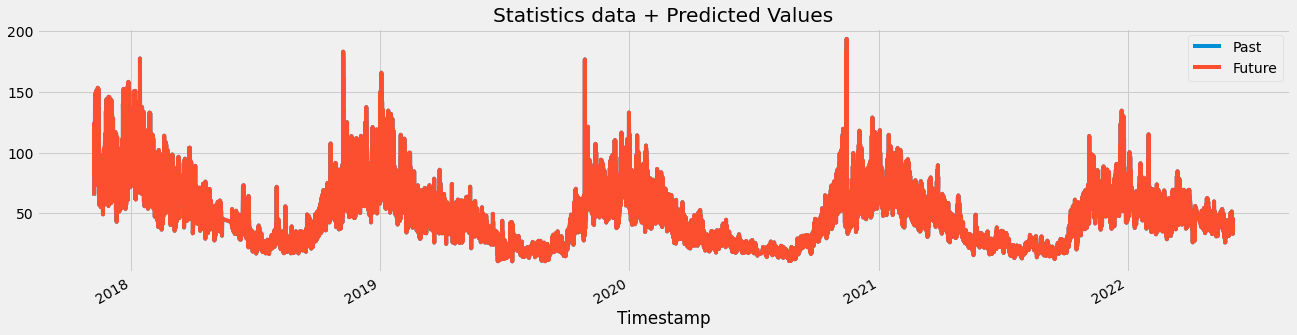

In [171]:
fig, ax = plt.subplots(figsize=(20, 5))
clear_df.plot(ax=ax, label='Original DataSet', title='Statistics data + Predicted Values')
y_pred_df.plot(ax=ax, label='Future Prediction')
ax.legend(['Past', 'Future'])
plt.show()

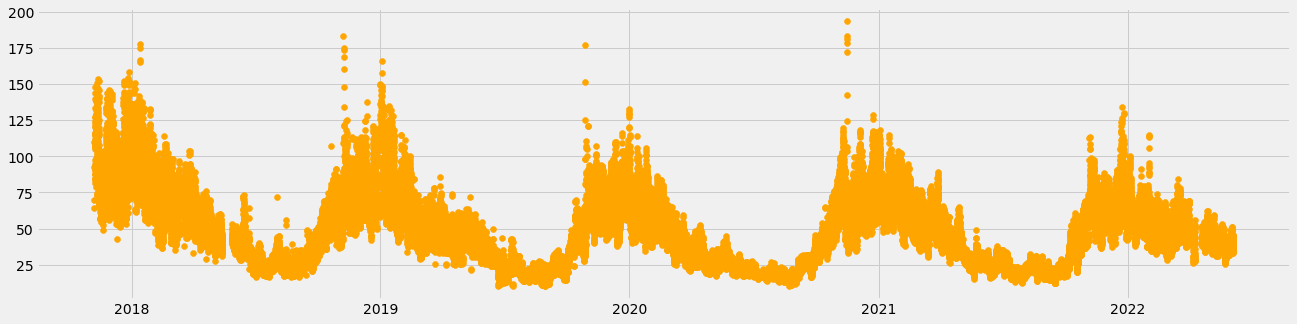

In [172]:
fig, ax = plt.subplots(figsize=(20, 5))
plt.scatter(y_pred_df.index, y_pred_df.pm, color='orange')

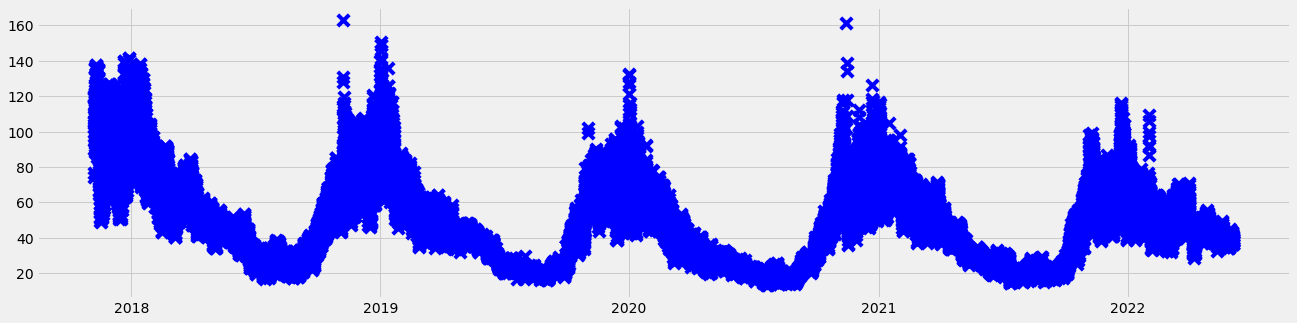

In [173]:
fig, ax = plt.subplots(figsize=(20, 5))
plt.scatter(y_pred_df.index, y_pred, s=130, marker='x', color='blue')

In [174]:
# Checking the last daate_time value of the main DataSet
df.index.max()

Timestamp('2022-06-04 15:00:00')

In [175]:
# Creating data_time indexes till the end of the year
future = pd.date_range('2022-06-05','2022-12-31', freq='1h')
print(future)

DatetimeIndex(['2022-06-05 00:00:00', '2022-06-05 01:00:00',
               '2022-06-05 02:00:00', '2022-06-05 03:00:00',
               '2022-06-05 04:00:00', '2022-06-05 05:00:00',
               '2022-06-05 06:00:00', '2022-06-05 07:00:00',
               '2022-06-05 08:00:00', '2022-06-05 09:00:00',
               ...
               '2022-12-30 15:00:00', '2022-12-30 16:00:00',
               '2022-12-30 17:00:00', '2022-12-30 18:00:00',
               '2022-12-30 19:00:00', '2022-12-30 20:00:00',
               '2022-12-30 21:00:00', '2022-12-30 22:00:00',
               '2022-12-30 23:00:00', '2022-12-31 00:00:00'],
              dtype='datetime64[ns]', length=5017, freq='H')


In [176]:
df.tail()

,hour,day_of_week,quarter,month,year,day_of_year,day_of_month,week_of_year,pm,lag1,lag2,lag3
Timestamp,,,,,,,,,,,,
2022-06-04 11:00:00,11,5,2,6,2022,155,4,22,35.89,23.49,19.53,27.59
2022-06-04 12:00:00,12,5,2,6,2022,155,4,22,33.83,22.21,20.26,27.39
2022-06-04 13:00:00,13,5,2,6,2022,155,4,22,33.05,22.44,20.96,28.79
2022-06-04 14:00:00,14,5,2,6,2022,155,4,22,35.29,23.45,21.34,29.38
2022-06-04 15:00:00,15,5,2,6,2022,155,4,22,40.67,24.05,24.12,27.93


In [177]:
# Creating DF where indexes are data-times from the future series
future_df = pd.DataFrame(index=future)

# Creating a column where flag is True if indexes are from future series
future_df['isFuture'] = True
# Creating the same with the original DataFrame, but with flag equels to False
df['isFuture'] = False
future_df.head()

,isFuture
2022-06-05 00:00:00,True
2022-06-05 01:00:00,True
2022-06-05 02:00:00,True
2022-06-05 03:00:00,True
2022-06-05 04:00:00,True


In [178]:
# Checkin the shape of the future :)
future.shape[0]

5017

In [179]:
# Let's concat these two DataFrames
original_df_plus_future = pd.concat([df, future_df])

original_df_plus_future = create_features(original_df_plus_future)
original_df_plus_future = add_lags(original_df_plus_future)
original_df_plus_future.head()

,hour,day_of_week,quarter,month,year,day_of_year,day_of_month,week_of_year,lag1,lag2,lag3,isFuture,pm
2017-11-07 12:00:00,12,1,4,11,2017,311,7,45,NaN,NaN,NaN,False,64.51
2017-11-07 13:00:00,13,1,4,11,2017,311,7,45,NaN,NaN,NaN,False,69.95
2017-11-07 14:00:00,14,1,4,11,2017,311,7,45,NaN,NaN,NaN,False,92.79
2017-11-07 15:00:00,15,1,4,11,2017,311,7,45,NaN,NaN,NaN,False,109.66
2017-11-07 16:00:00,16,1,4,11,2017,311,7,45,NaN,NaN,NaN,False,116.50


In [180]:
original_df_plus_future.tail()

,hour,day_of_week,quarter,month,year,day_of_year,day_of_month,week_of_year,lag1,lag2,lag3,isFuture,pm
2022-12-30 20:00:00,20,4,4,12,2022,364,30,52,71.56,104.38,68.12,True,NaN
2022-12-30 21:00:00,21,4,4,12,2022,364,30,52,70.27,104.19,66.65,True,NaN
2022-12-30 22:00:00,22,4,4,12,2022,364,30,52,66.78,99.09,61.09,True,NaN
2022-12-30 23:00:00,23,4,4,12,2022,364,30,52,61.29,95.64,57.32,True,NaN
2022-12-31 00:00:00,0,5,4,12,2022,365,31,52,58.18,92.77,53.74,True,NaN


In [181]:
# Creating new DataFrame that consists only future indexes with all made-before features
future_with_features = original_df_plus_future.query('isFuture').copy()
future_with_features.head()

#future_without_features['pred'] = reg.predict(original_df_plus_future[FEATURES])

,hour,day_of_week,quarter,month,year,day_of_year,day_of_month,week_of_year,lag1,lag2,lag3,isFuture,pm
2022-06-05 00:00:00,0,6,2,6,2022,156,5,22,23.95,21.49,NaN,True,NaN
2022-06-05 01:00:00,1,6,2,6,2022,156,5,22,24.42,21.82,NaN,True,NaN
2022-06-05 02:00:00,2,6,2,6,2022,156,5,22,26.37,22.26,NaN,True,NaN
2022-06-05 03:00:00,3,6,2,6,2022,156,5,22,28.34,23.36,NaN,True,NaN
2022-06-05 04:00:00,4,6,2,6,2022,156,5,22,30.17,24.17,NaN,True,NaN


In [182]:
future_with_features.shape

(5017, 13)

In [183]:
# Predicting
future_with_features['pm'] = reg.predict(future_with_features[FEATURES])

In [184]:
# Plotting
df_indexes_plus_pm = future_with_features['pm']
df_indexes_plus_pm.head()

2022-06-05 00:00:00 33.724648
2022-06-05 01:00:00 33.356529
2022-06-05 02:00:00 33.168839
2022-06-05 03:00:00 34.658348
2022-06-05 04:00:00 35.361439
Name: pm, dtype: float32

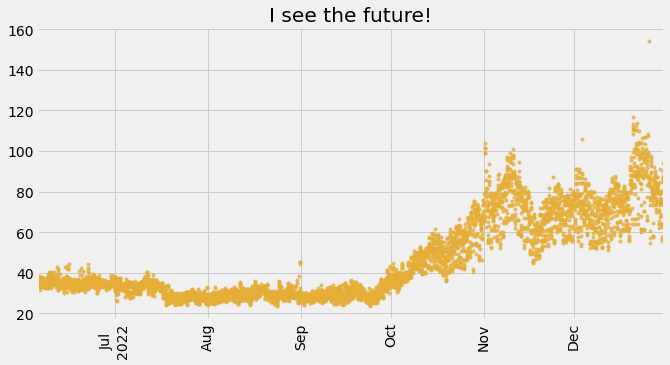

In [185]:
df_indexes_plus_pm.plot(style='.',
                        alpha=0.75, rot=90,
                        figsize=(10, 5),
                        color=color_pal[2],
                        title='I see the future!')
plt.show()

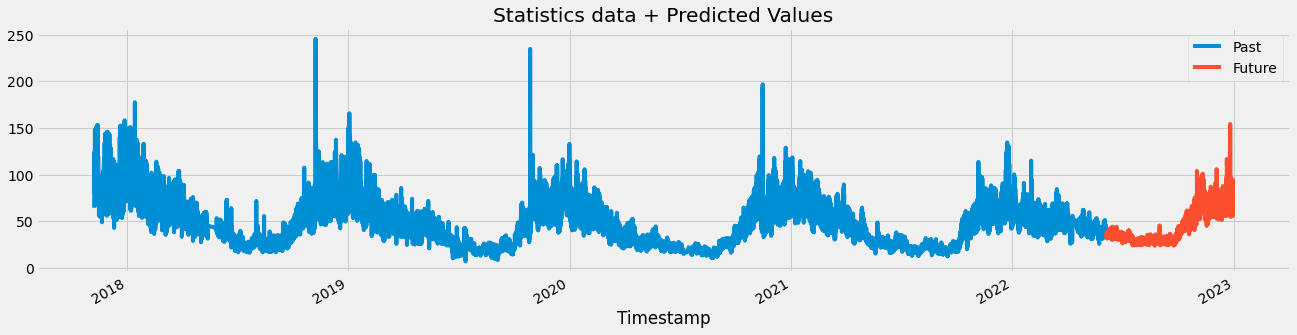

In [186]:
fig, ax = plt.subplots(figsize=(20, 5))
original_df.plot(ax=ax, label='Original DataSet', title='Statistics data + Predicted Values')
df_indexes_plus_pm.plot(ax=ax, label='Future Prediction')
ax.legend(['Past', 'Future'])
plt.show()

## Trying DessisionTreeRegression

In [187]:
FEATURES = [
        'hour',
        'day_of_week',
        'quarter',
        'month',
        'year',
        'day_of_year',
        'day_of_month',
        
        'week_of_year',
        ]

TARGET = 'pm'

In [188]:
dessision_tree_df = clear_df_plus_dt_features

x_data = dessision_tree_df [FEATURES]
y_data = dessision_tree_df [TARGET]

In [189]:
dessision_tree_df.head()

,hour,day_of_week,quarter,month,year,day_of_year,day_of_month,week_of_year,pm
Timestamp,,,,,,,,,
2017-11-07 12:00:00,12,1,4,11,2017,311,7,45,64.51
2017-11-07 13:00:00,13,1,4,11,2017,311,7,45,69.95
2017-11-07 14:00:00,14,1,4,11,2017,311,7,45,92.79
2017-11-07 15:00:00,15,1,4,11,2017,311,7,45,109.66
2017-11-07 16:00:00,16,1,4,11,2017,311,7,45,116.50


In [190]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0)
Model = RandomForestRegressor()
Model.fit(x_train, y_train)

score = Model.score(x_train, y_train)

In [191]:
print(f"R-squared: {score:.3f}")

R-squared: 0.996


In [192]:
# Prediction
y_pred = Model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.3f}")
print(f"RMSE: {mse*(1/2.0):.3f}") 

MSE: 21.186
RMSE: 10.593


In [193]:
# Checking coefficient of determination of the model
print(f"Coefficient of Determination is equel to: {r2_score(y_pred, y_test):.4f}")

Coefficient of Determination is equel to: 0.9631


## Trying NeuralProphet

In [226]:
from neuralprophet import NeuralProphet

In [227]:
clear_df.head()

,pm
Timestamp,
2017-11-07 12:00:00,64.51
2017-11-07 13:00:00,69.95
2017-11-07 14:00:00,92.79
2017-11-07 15:00:00,109.66
2017-11-07 16:00:00,116.50


In [228]:
# Creating work DataFrame
work_df = clear_df.copy()
work_df.head()

,pm
Timestamp,
2017-11-07 12:00:00,64.51
2017-11-07 13:00:00,69.95
2017-11-07 14:00:00,92.79
2017-11-07 15:00:00,109.66
2017-11-07 16:00:00,116.50


In [229]:
# Creating proper columns
work_df['date'] = work_df.index
work_df['date'] = pd.to_datetime(work_df.date)
work_df.rename(columns={"date": "ds", "pm": "y"}, inplace=True)

# Mooving "y" column to the end
work_df = work_df.reindex(columns = [col for col in work_df.columns if col != 'y'] + ['y'])
work_df.head()

,ds,y
Timestamp,,
2017-11-07 12:00:00,2017-11-07 12:00:00,64.51
2017-11-07 13:00:00,2017-11-07 13:00:00,69.95
2017-11-07 14:00:00,2017-11-07 14:00:00,92.79
2017-11-07 15:00:00,2017-11-07 15:00:00,109.66
2017-11-07 16:00:00,2017-11-07 16:00:00,116.50


In [230]:
work_df.describe()

,y
count,36175.000000
mean,49.274402
std,24.710494
min,10.210000
25%,28.090000
50%,45.730000
75%,64.510000
max,193.800000


In [231]:
# Training model
model = NeuralProphet()
metrics = model.fit(work_df, freq="D")

# Creating future dates and predicting
future = model.make_future_dataframe(work_df, periods=365, n_historic_predictions=len(work_df)) 
forecast = model.predict(future)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 97.977% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency D is different than major frequency H
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 74
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 97.977% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency D is different than major frequency H
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 96.998% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency D is di

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


Text(0.5, 1.0, 'Air Quality')

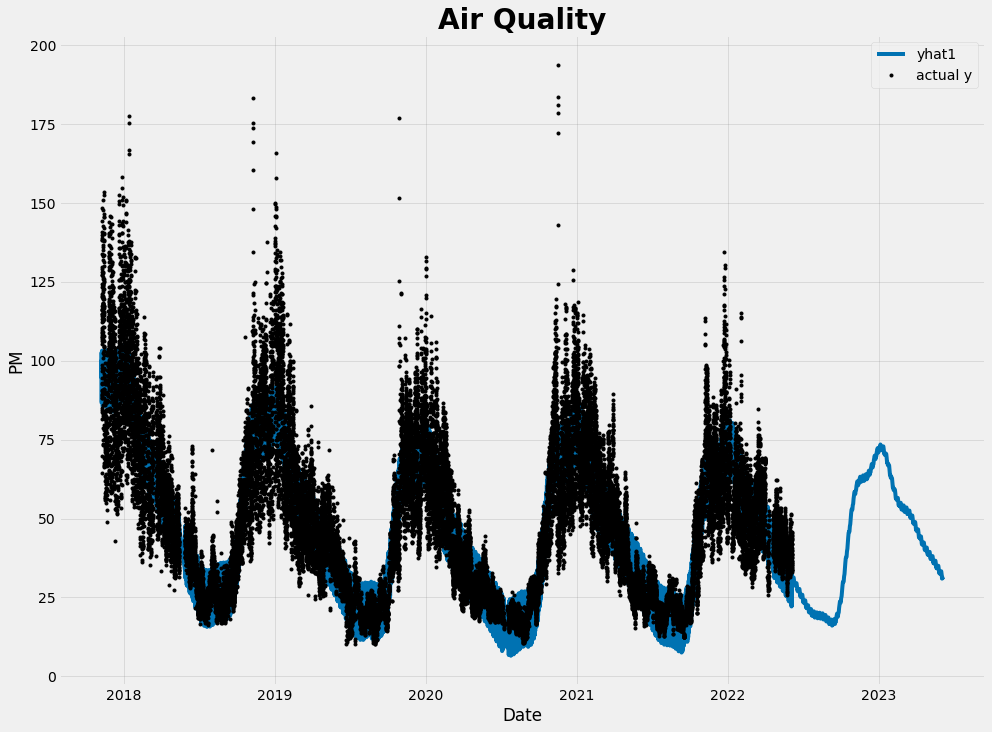

In [233]:
#PLotting real data and predicted values PLUS furure
fig, ax = plt.subplots(figsize=(14, 10)) 
model.plot(forecast, xlabel="Date", ylabel="PM", ax=ax)
ax.set_title("Air Quality", fontsize=28, fontweight="bold")

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


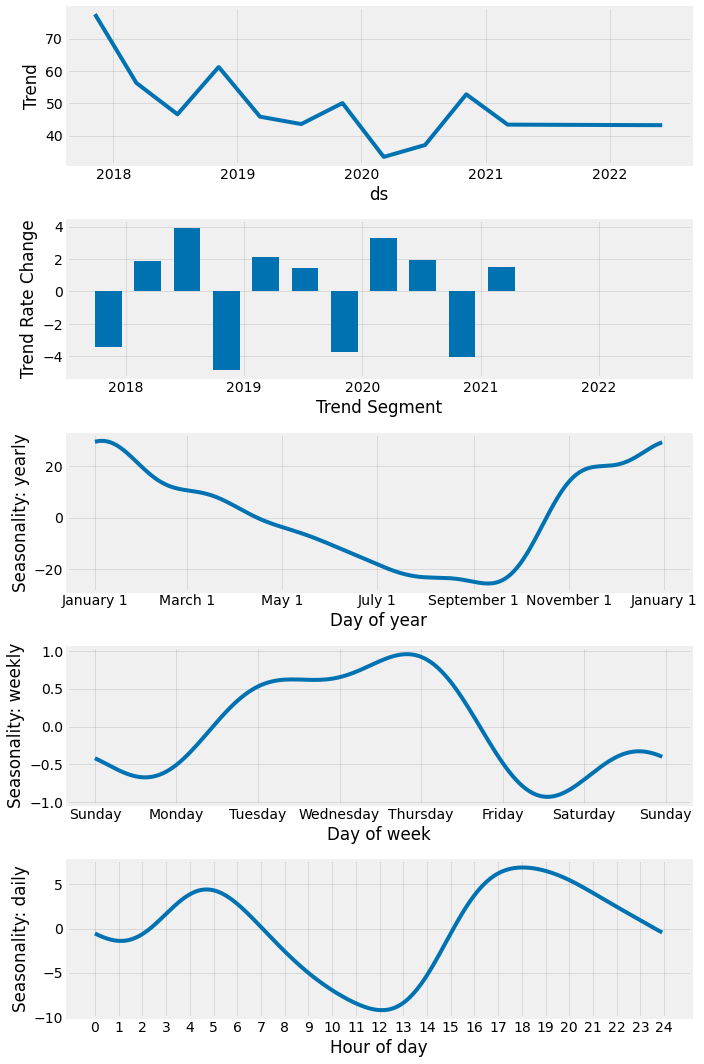

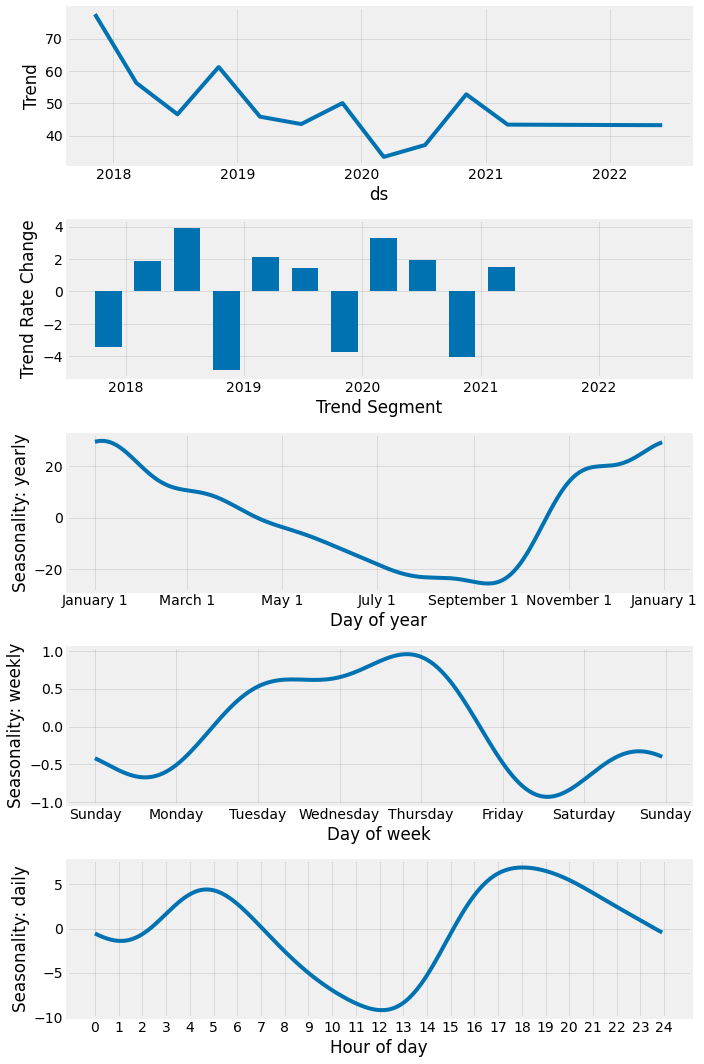

In [235]:
model.plot_parameters()

In [237]:
metrics.columns

Index(['MAE', 'RMSE', 'Loss', 'RegLoss', 'epoch'], dtype='object')

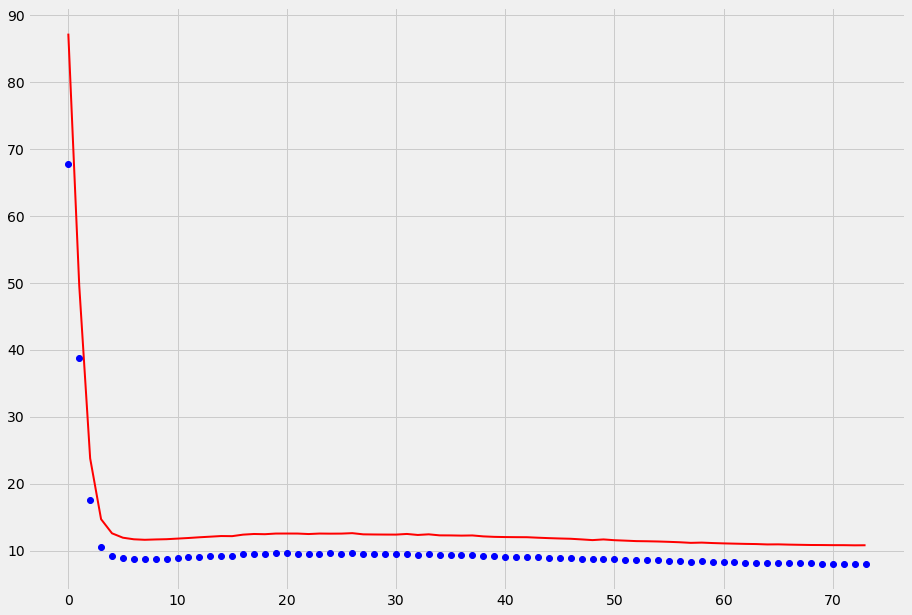

In [240]:

fig, ax = plt.subplots(figsize=(14, 10))
ax.plot(metrics["MAE"], 'ob', linewidth=6, label="Training Loss")  
ax.plot(metrics["RMSE"], '-r', linewidth=2, label="Validation Loss")